# 연도별 발행 개수 구하기

In [1]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv',quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: C:\Users\khj\데이터분석\ns_book7.csv
100%|█████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [00:03<00:00, 15.8MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [3]:
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

In [4]:
count_by_year = count_by_year.sort_index()
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [5]:
count_by_year = count_by_year[count_by_year.index <=2030]
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

# 주제별 도서 개수 구하기

In [6]:
import numpy as np

def kdc_1st_char(no):
    if no is np.nan:
        return '-1'
    else:
        return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

# 선 그래프 그리기

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

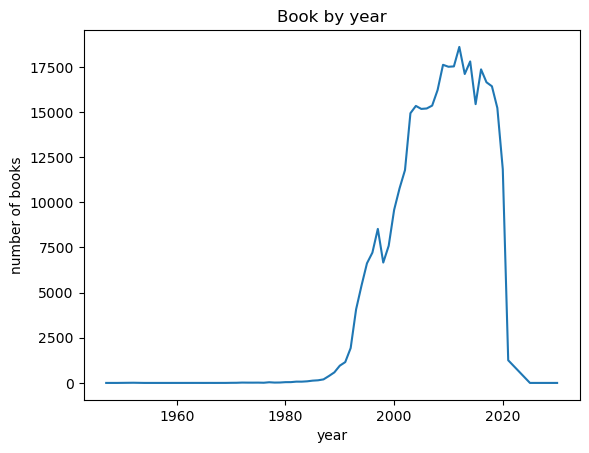

In [8]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

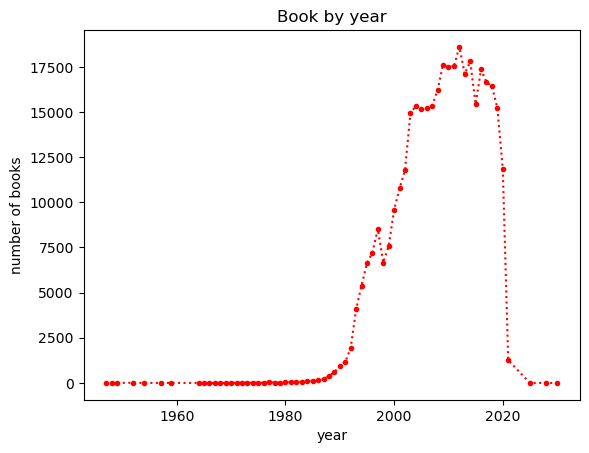

In [9]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

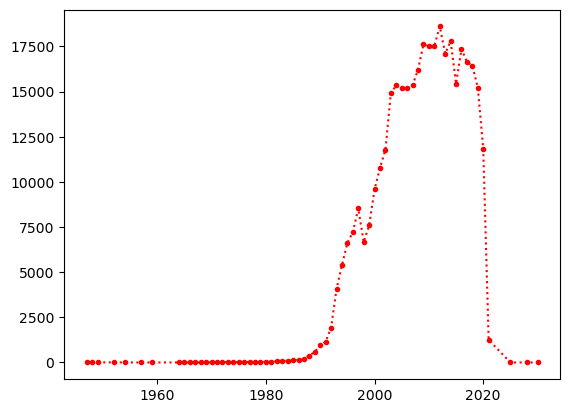

In [10]:
plt.plot(count_by_year, '.:r')

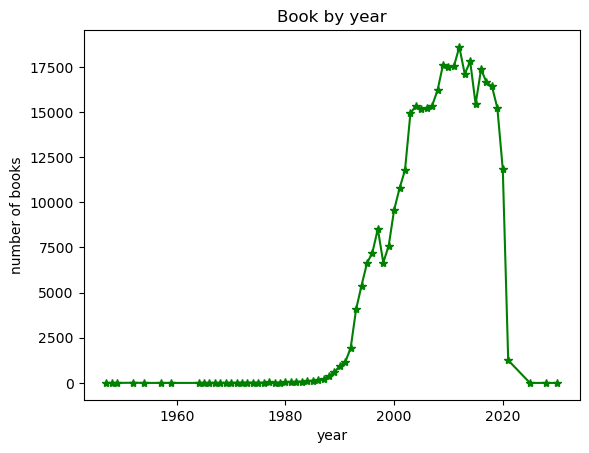

In [11]:
plt.plot(count_by_year, '*-g')
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

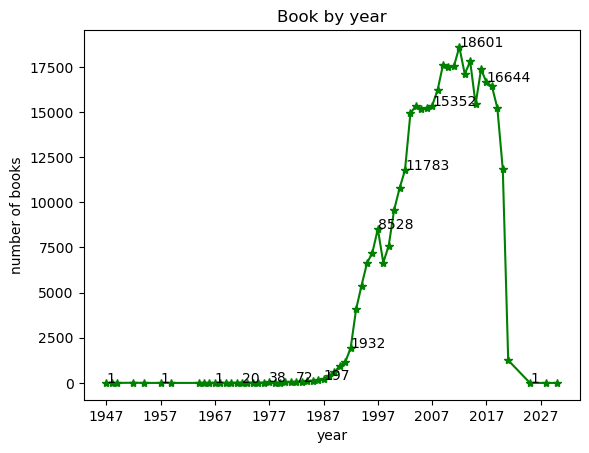

In [12]:
plt.plot(count_by_year, '*-g')
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val))
plt.show()

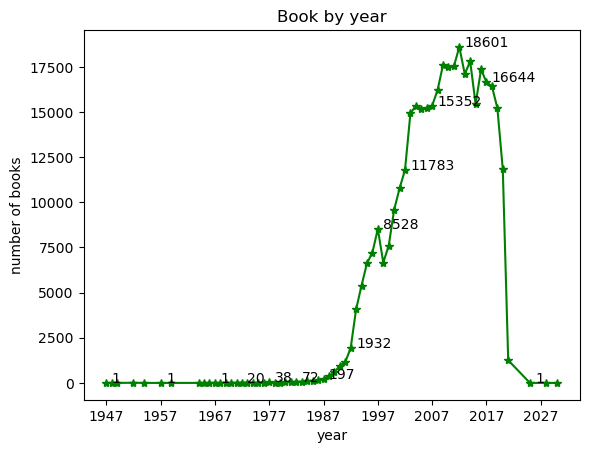

In [13]:
plt.plot(count_by_year, '*-g')
plt.title('Book by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val), xytext=(idx+1, val+10))
plt.show()

# 막대 그래프 그리기

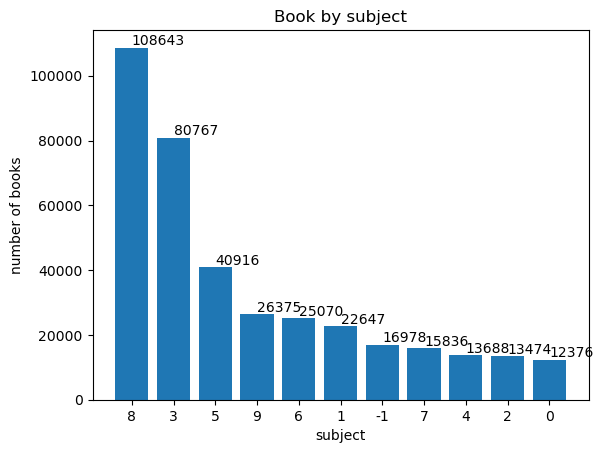

In [14]:
plt.bar(count_by_subject.index,count_by_subject.values)
plt.title('Book by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

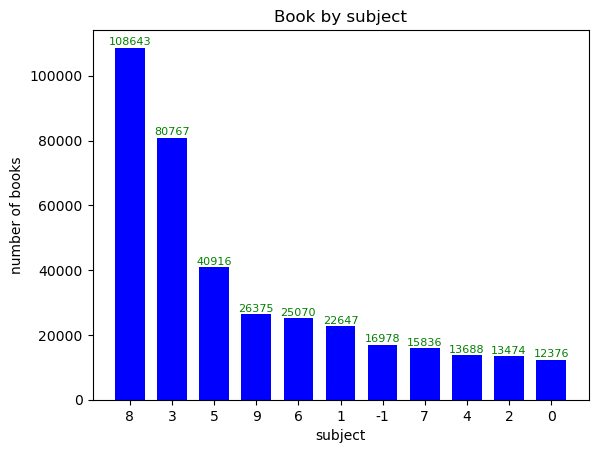

In [15]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color = 'blue')
plt.title('Book by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points', fontsize=8, ha='center', color='green')
plt.show()

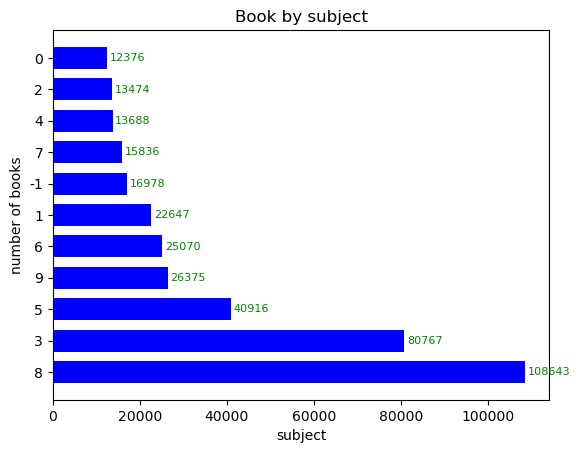

In [16]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color = 'blue')
plt.title('Book by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points', fontsize=8, va='center', color='green')
plt.show()

# 이미지 출력하고 저장하기

In [17]:
img =plt.imread('jupiter.png')
img.shape

(1561, 1646, 3)

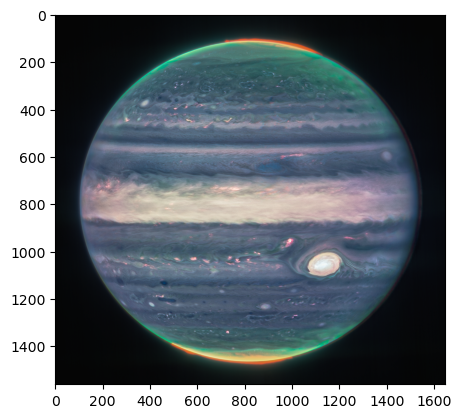

In [18]:
plt.imshow(img)
plt.show()

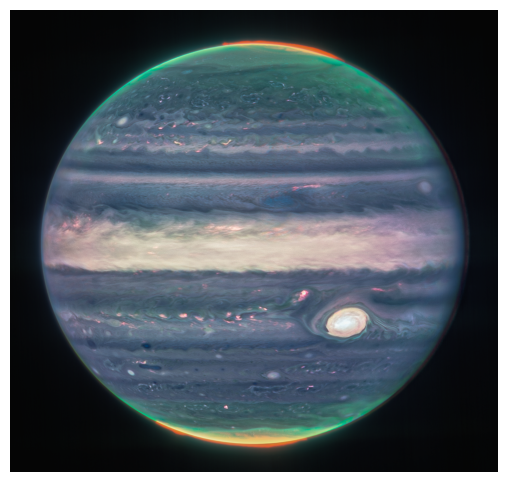

In [19]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
plt.rcParams['savefig.dpi']

'figure'

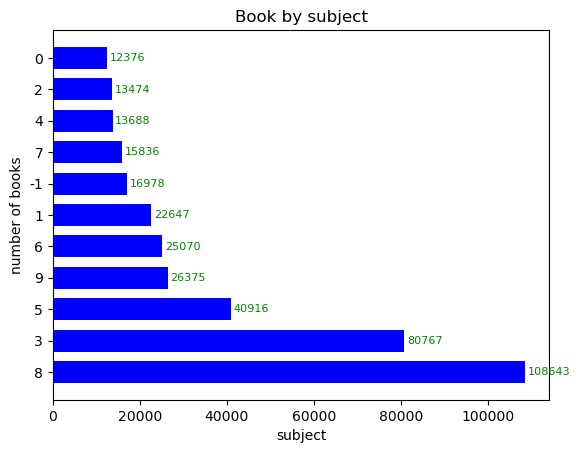

In [21]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color = 'blue')
plt.title('Book by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points', fontsize=8, va='center', color='green')

plt.savefig('books_by_subject.png')
plt.show()